In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
'''
	Build the different cluster models.---------
	Analyse the optimum number of cluster using appropriate techniques.
	Make the appropriate business interpretation using the cluster centroids.

	Perform the EDA on cluster groups to understand the cluster characteristics.

	Perform PCA and apply clustering on top of it. Comment whether PCA is really helping the clustering process.  
	Also try different graphs to visualize the clusters and its characteristics'''

'\n\uf0d8\tBuild the different cluster models.---------\n\uf0d8\tAnalyse the optimum number of cluster using appropriate techniques.\n\uf0d8\tMake the appropriate business interpretation using the cluster centroids.\n\uf0d8\tPerform the EDA on cluster groups to understand the cluster characteristics.\n\uf0d8\tPerform PCA and apply clustering on top of it. Comment whether PCA is really helping the clustering process.  \n\uf0d8\tAlso try different graphs to visualize the clusters and its characteristics'

In [25]:
df= pd.read_csv('/content/online_shoppers_intention.csv')
print(df.shape)

(12330, 18)


In [26]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [27]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


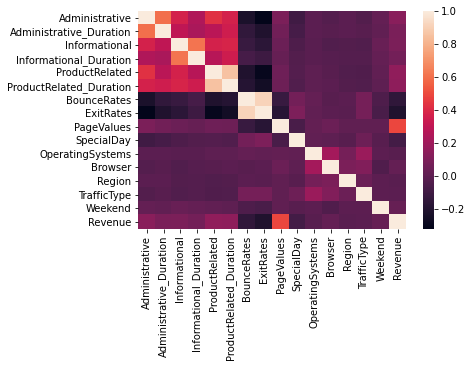

In [28]:
sns.heatmap(df.corr())

In [29]:
dft= df.iloc[:,:15]

In [30]:
mon= dft['Month']
dft.drop({'Month'}, axis=1, inplace=True)

In [31]:
col= dft.columns

In [32]:
from sklearn.preprocessing import PowerTransformer
pt= PowerTransformer()


In [33]:
dft = pt.fit_transform(dft)

In [34]:
dft= pd.DataFrame(dft, columns=col)

In [35]:
dft.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
0,-0.990128,-0.996659,-0.520489,-0.491697,-1.922123,-2.096783,2.206432,1.982547,-0.529409,-0.33602,-1.594583,-1.630444,-1.116671,-1.458641
1,-0.990128,-0.996659,-0.520489,-0.491697,-1.574524,-1.074189,-0.799209,1.569866,-0.529409,-0.33602,0.023949,0.100778,-1.116671,-0.386728
2,-0.990128,-0.996659,-0.520489,-0.491697,-1.922123,-2.096783,2.206432,1.982547,-0.529409,-0.33602,1.816290,-1.630444,1.658089,0.199041
3,-0.990128,-0.996659,-0.520489,-0.491697,-1.574524,-1.875436,1.709303,1.832073,-0.529409,-0.33602,1.065020,0.100778,-0.199574,0.574105
4,-0.990128,-0.996659,-0.520489,-0.491697,-0.442610,0.057515,0.756734,0.722460,-0.529409,-0.33602,1.065020,0.918635,-1.116671,0.574105


In [36]:
dfr= df[['Month', 'VisitorType', 'Weekend', 'Revenue']]
dfr.head()

,Month,VisitorType,Weekend,Revenue
0,Feb,Returning_Visitor,False,False
1,Feb,Returning_Visitor,False,False
2,Feb,Returning_Visitor,False,False
3,Feb,Returning_Visitor,False,False
4,Feb,Returning_Visitor,True,False


In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
for i in dfr.columns:
  dfr[i] = LabelEncoder().fit_transform(dfr[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [39]:
dfr.head()

,Month,VisitorType,Weekend,Revenue
0,2,2,0,0
1,2,2,0,0
2,2,2,0,0
3,2,2,0,0
4,2,2,1,0


In [40]:
dft= dft.join(dfr)

In [41]:
dft.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Month,VisitorType,Weekend,Revenue
0,-0.990128,-0.996659,-0.520489,-0.491697,-1.922123,-2.096783,2.206432,1.982547,-0.529409,-0.33602,-1.594583,-1.630444,-1.116671,-1.458641,2,2,0,0
1,-0.990128,-0.996659,-0.520489,-0.491697,-1.574524,-1.074189,-0.799209,1.569866,-0.529409,-0.33602,0.023949,0.100778,-1.116671,-0.386728,2,2,0,0
2,-0.990128,-0.996659,-0.520489,-0.491697,-1.922123,-2.096783,2.206432,1.982547,-0.529409,-0.33602,1.816290,-1.630444,1.658089,0.199041,2,2,0,0
3,-0.990128,-0.996659,-0.520489,-0.491697,-1.574524,-1.875436,1.709303,1.832073,-0.529409,-0.33602,1.065020,0.100778,-0.199574,0.574105,2,2,0,0
4,-0.990128,-0.996659,-0.520489,-0.491697,-0.442610,0.057515,0.756734,0.722460,-0.529409,-0.33602,1.065020,0.918635,-1.116671,0.574105,2,2,1,0


In [42]:
# Lets try K means clustering first.
import scipy.cluster.hierarchy as sch
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [43]:
rev= dft['Revenue']
dft.drop({'Revenue'}, axis=1, inplace=True)

In [44]:
we= []
sc= []
for i in range(2, 15):
  km= KMeans(n_clusters=i, random_state=42)
  km.fit(dft)
  we.append(km.inertia_)
  lab= km.labels_
  sc.append(silhouette_score(dft,lab))

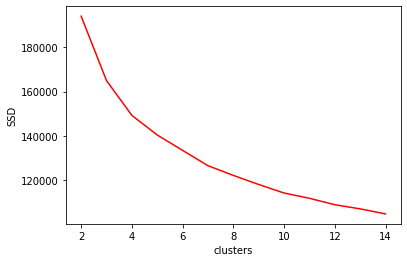

In [45]:
plt.plot(range(2,15), we, 'r')
plt.xlabel('clusters')
plt.ylabel('SSD')
plt.show()

In [46]:
# For KMeans optimum number of cluster is 3

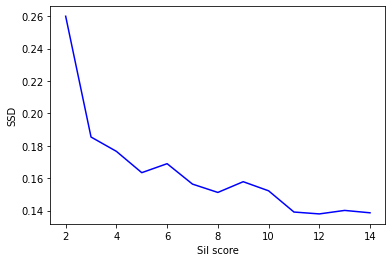

In [47]:
plt.plot(range(2,15), sc, 'b')
plt.xlabel('Sil score')
plt.ylabel('SSD')
plt.show()

In [48]:
dft.shape

(12330, 17)

In [49]:
km= KMeans(n_clusters=2, random_state=42)
km.fit(dft.iloc[:,:17])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [52]:
lab= km.labels_
dft['km_cl'] = lab

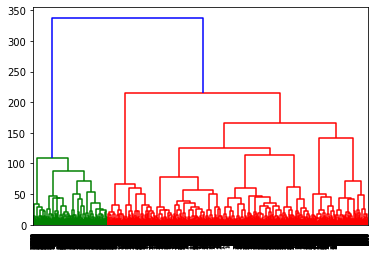

In [53]:
# Agglomerative 

from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(dft, method='ward'))

In [54]:
# For Agglo, optimum number of cluster is 2

In [55]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model.fit(dft)
labels = model.labels_

In [56]:
dft['agg_cl'] = labels
dft['real'] = rev

pd.crosstab(dft['agg_cl'], dft['real'])

real,0,1
agg_cl,,
0,8020,1554
1,2402,354


In [57]:
# PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [58]:
pca = PCA()
pca.fit(dft.iloc[:,:17])

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [59]:
pca.explained_variance_

array([5.70769722, 4.21589722, 1.61994136, 1.46523601, 1.15699505,
       1.05827083, 1.00057941, 0.9724255 , 0.82118087, 0.75425643,
       0.5586385 , 0.37655049, 0.20613531, 0.17419618, 0.09212853,
       0.05156225, 0.04295098])

In [60]:
np.cumsum(pca.explained_variance_ratio_)

array([0.28151901, 0.48945843, 0.5693583 , 0.64162769, 0.69869381,
       0.75089058, 0.80024185, 0.8482045 , 0.88870735, 0.92590931,
       0.95346287, 0.97203535, 0.9822025 , 0.99079433, 0.99533835,
       0.99788154, 1.        ])

In [61]:
# 10 features are explaining over 93%

pca = PCA(n_components=10)
pca.fit(dft.iloc[:,:17])
X_pca = pca.transform(dft.iloc[:,:17])
X_pca.shape

(12330, 10)

In [63]:
X_pca

array([[ 3.96785452, -3.15722684,  1.85215671, ..., -1.26255046,
        -0.05049768,  0.45972144],
       [ 3.66514004, -1.76491049, -0.01819127, ..., -1.09396967,
         0.25494108,  0.55265283],
       [ 3.96635745, -3.19045064,  1.42319174, ...,  0.94570354,
        -0.88983437, -0.30611275],
       ...,
       [-1.28554907, -3.0950321 ,  0.96916537, ..., -1.17505276,
        -1.43253793, -0.88198257],
       [-1.90996153,  0.05167406, -1.14737825, ...,  0.22578623,
        -0.01983872, -0.80240356],
       [-1.22607129, -2.62839279, -0.65539893, ..., -1.20864187,
         0.58324809,  0.76846846]])

In [64]:
xpca= pd.DataFrame(X_pca, columns=[i for i in range(10)])

In [65]:
xpca

,0,1,2,3,4,5,6,7,8,9
0,3.967855,-3.157227,1.852157,-2.473557,0.078589,-0.558001,-0.953455,-1.262550,-0.050498,0.459721
1,3.665140,-1.764910,-0.018191,-0.207546,-0.165361,-0.545207,0.790807,-1.093970,0.254941,0.552653
2,3.966357,-3.190451,1.423192,0.356660,1.693341,-0.281747,-0.720689,0.945704,-0.889834,-0.306113
3,3.842579,-2.801770,1.073932,0.833321,1.047133,0.111045,0.066903,-0.639180,-0.699332,-0.047416
4,3.427203,-1.026062,0.059997,1.414241,-0.540125,0.294762,0.522586,-1.178781,-0.680046,-0.552744
...,...,...,...,...,...,...,...,...,...,...
12325,3.717338,2.560343,-1.035019,2.128029,-0.208718,-0.163738,-1.828935,-2.153729,-0.470230,1.046296
12326,-1.549349,-1.612734,-0.964443,0.682029,-0.308619,0.194674,1.965102,-0.726031,-0.438501,-0.271849
12327,-1.285549,-3.095032,0.969165,0.991682,0.403127,0.876051,0.550889,-1.175053,-1.432538,-0.881983
12328,-1.909962,0.051674,-1.147378,-0.089901,1.499494,0.824296,0.568361,0.225786,-0.019839,-0.802404


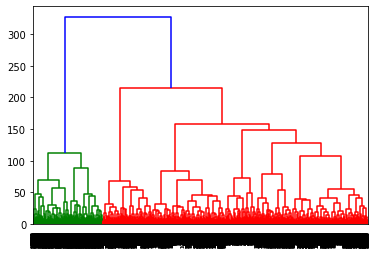

In [66]:
# Lets apply agglo clustering on this now. 
dendrogram = sch.dendrogram(sch.linkage(xpca, method='ward'))

In [ ]:
# For Agglo, optimum number of cluster is 3

# but lets try with 2 first

In [67]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model.fit(xpca)
labels = model.labels_

In [68]:
xpca['agg_cl'] = labels
xpca['real'] = rev

pd.crosstab(xpca['agg_cl'], xpca['real'])

real,0,1
agg_cl,,
0,8159,1591
1,2263,317


In [ ]:
# This is comparitively a little better score than without PCA. So PCA has helped a little.

#	Make the appropriate business interpretation using the cluster centroids.

#	Perform the EDA on cluster groups to understand the cluster characteristics.

In [69]:
xpca

,0,1,2,3,4,5,6,7,8,9,agg_cl,real
0,3.967855,-3.157227,1.852157,-2.473557,0.078589,-0.558001,-0.953455,-1.262550,-0.050498,0.459721,1,0
1,3.665140,-1.764910,-0.018191,-0.207546,-0.165361,-0.545207,0.790807,-1.093970,0.254941,0.552653,1,0
2,3.966357,-3.190451,1.423192,0.356660,1.693341,-0.281747,-0.720689,0.945704,-0.889834,-0.306113,1,0
3,3.842579,-2.801770,1.073932,0.833321,1.047133,0.111045,0.066903,-0.639180,-0.699332,-0.047416,1,0
4,3.427203,-1.026062,0.059997,1.414241,-0.540125,0.294762,0.522586,-1.178781,-0.680046,-0.552744,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.717338,2.560343,-1.035019,2.128029,-0.208718,-0.163738,-1.828935,-2.153729,-0.470230,1.046296,1,0
12326,-1.549349,-1.612734,-0.964443,0.682029,-0.308619,0.194674,1.965102,-0.726031,-0.438501,-0.271849,0,0
12327,-1.285549,-3.095032,0.969165,0.991682,0.403127,0.876051,0.550889,-1.175053,-1.432538,-0.881983,0,0
12328,-1.909962,0.051674,-1.147378,-0.089901,1.499494,0.824296,0.568361,0.225786,-0.019839,-0.802404,0,0


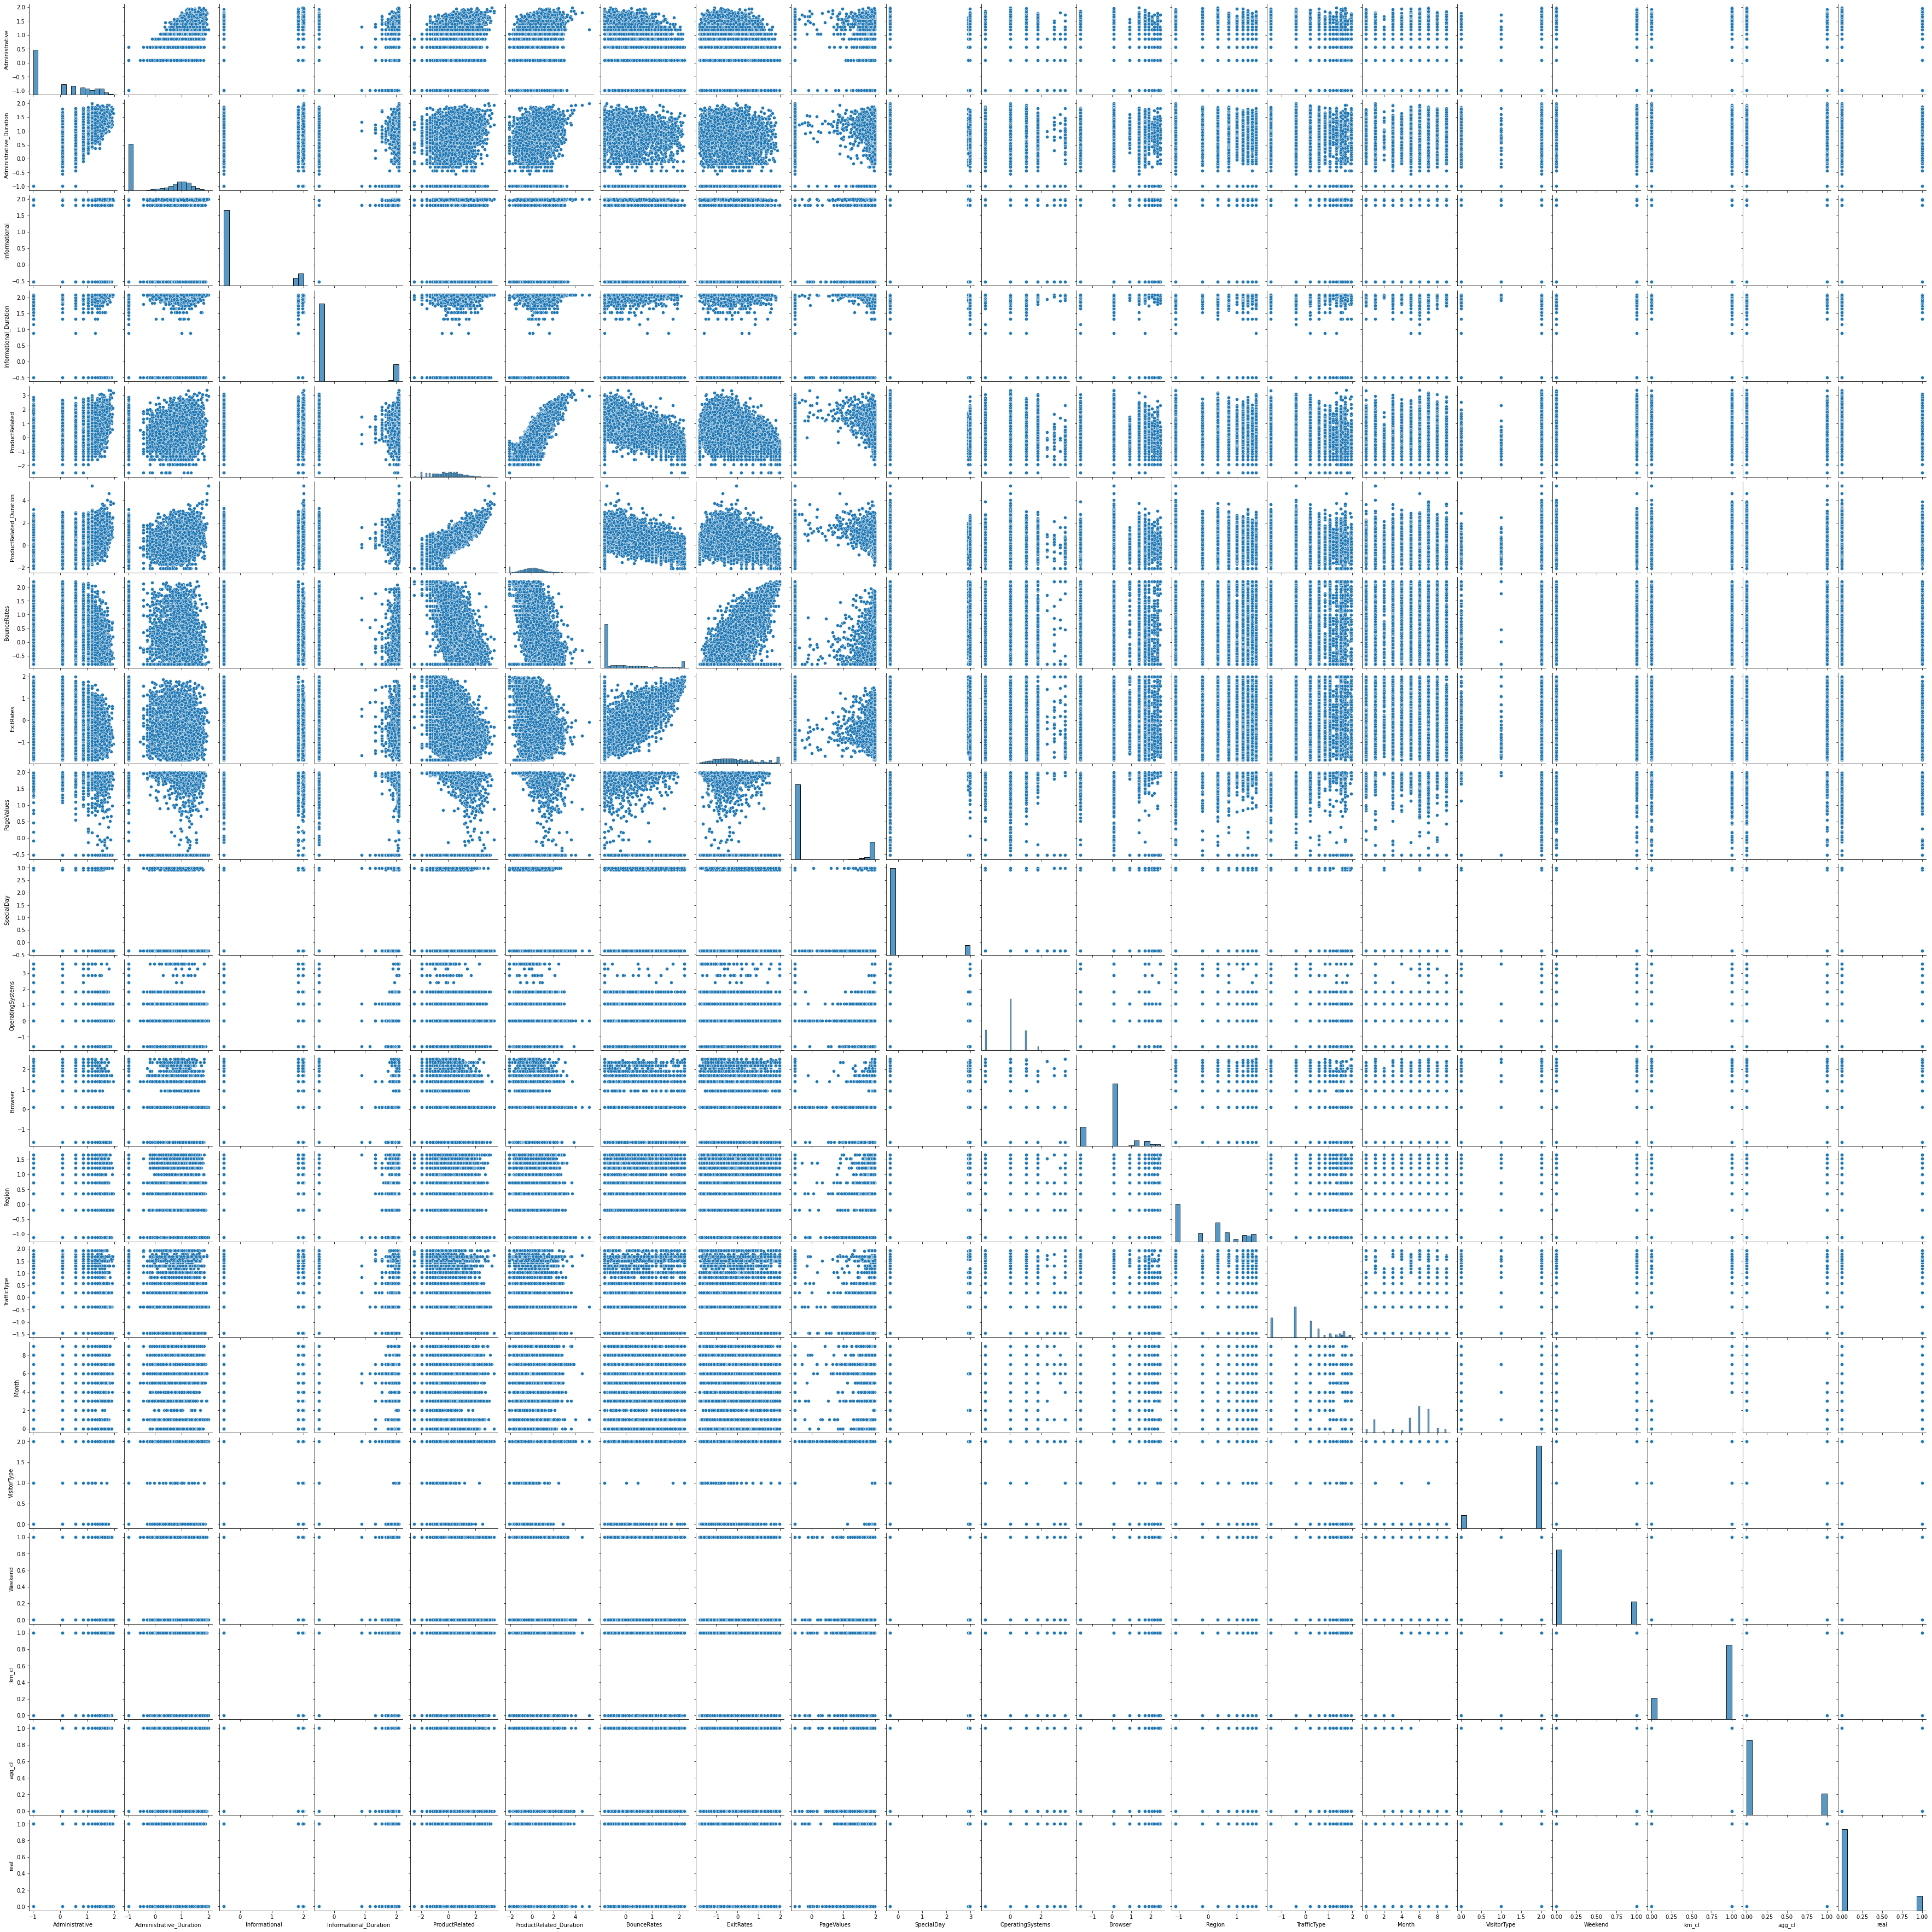

In [71]:
sns.pairplot(dft)